In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None 

In [3]:
data = pd.read_csv('ENB2012_data.csv') 

In [4]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


# Loading the data

When we observe the dataset, we see column names given in variable form. Since we are dealing with data, these column attributes should have meaningfull names to work with. Those variables has corresponded meanings in the kaggle dataset description. While we are loading the csv file we can pass this names into read_csv() method.

Steps for replacing column names with their description;
- Since our dataset has columns we have to set header variable as 0
- We need to store corresponded descriptions in array like column_names, for passing into read_csv() method.
- Set names variable equals to column_names array that we created in previous step

In [5]:
column_names = ['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height',
               'orientation', 'glazing_area', 'glazing_area_distribution', 'heating_load', 'cooling_load']

In [6]:
data = pd.read_csv('ENB2012_data.csv', header=0, names = column_names) 

In [7]:
data.head() # head() method returns top 5 rows from  dataset

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [8]:
data.tail() # tail() method returns bottown 5 rows from  dataset

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


- We are trying to predict heating_load and cooling_load values from other columns in the dataset. In that case, we have 8 attributes and 2 labels.

In [9]:
data.info() # We use info() method for accessing information about dataset such as, properties of data, types of data and number of data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative_compactness       768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   overall_height             768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   heating_load               768 non-null    float64
 9   cooling_load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


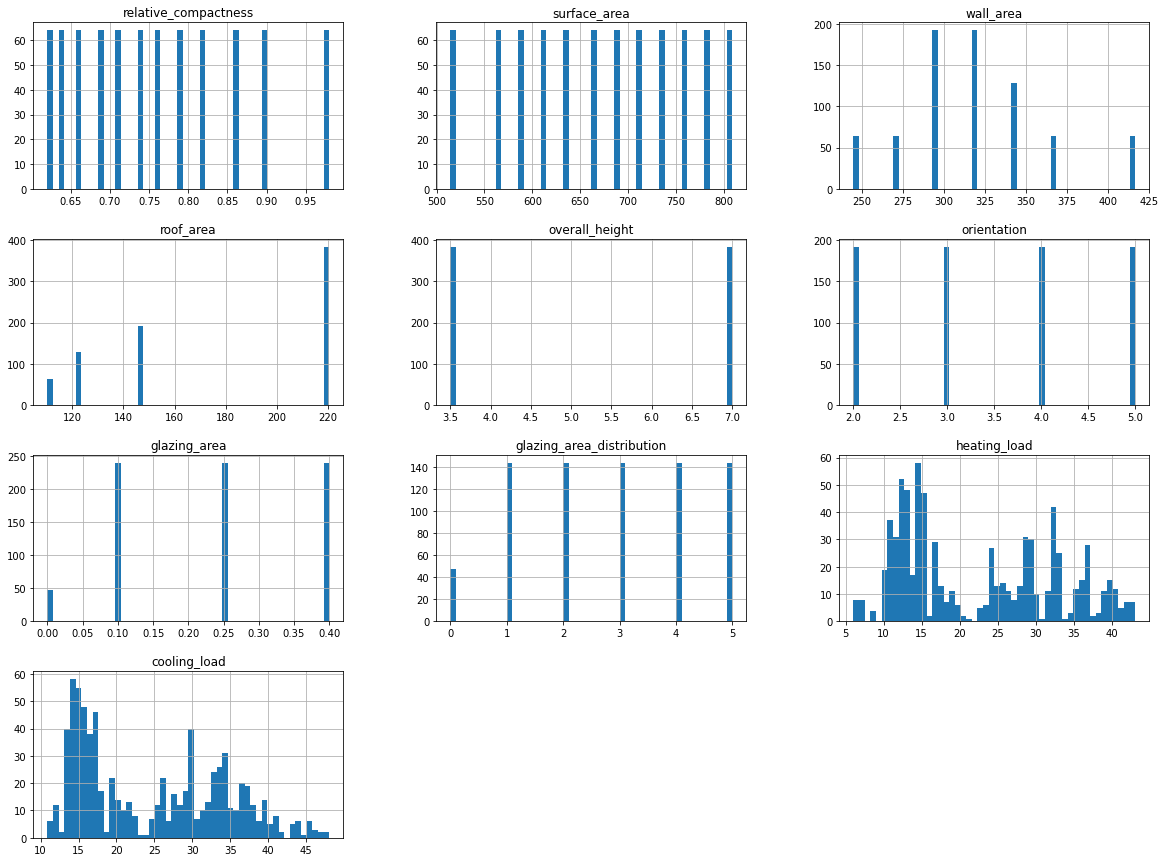

In [10]:
# We plot data as histograms for visualization

data.hist(bins=50,figsize=(20,15))
plt.show()

- When we inspect histogram plots we see that our attributes has discrete values. Their ranges are limited and they are not increasing continuously.

In [11]:
data.isnull().sum() # We must control that whether our data set contains any null values or not.

relative_compactness         0
surface_area                 0
wall_area                    0
roof_area                    0
overall_height               0
orientation                  0
glazing_area                 0
glazing_area_distribution    0
heating_load                 0
cooling_load                 0
dtype: int64

<AxesSubplot:>

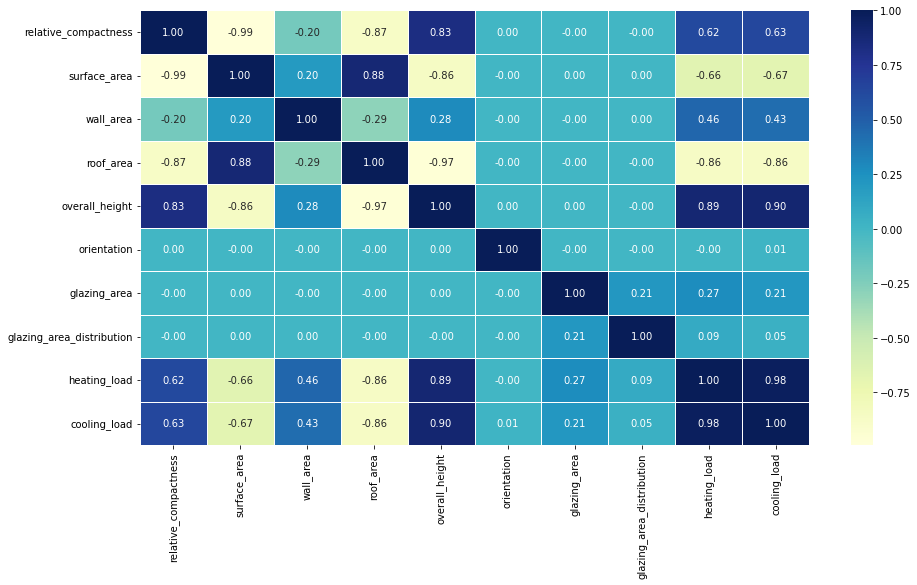

In [16]:
import seaborn as sns
from matplotlib import rcParams # For changing figure size

corr = data.corr()
rcParams['figure.figsize'] = 15,8 # set figure size here
sns.heatmap(corr, linewidths=.5, cmap = 'YlGnBu', annot = True, fmt='.2f')

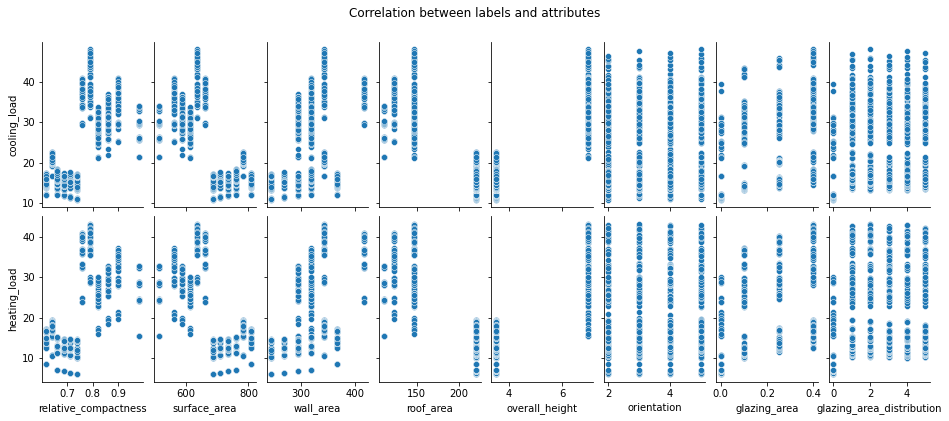

In [17]:
# Correlation between labels and attributes

rel = sns.pairplot(data=data, y_vars=['cooling_load','heating_load'],
                               x_vars=['relative_compactness', 'surface_area', 'wall_area', 'roof_area', 'overall_height',
                                       'orientation', 'glazing_area', 'glazing_area_distribution'])

rel.fig.set_size_inches(13,6) # sets size of the figure 

rel.fig.subplots_adjust(top=.9) # moves the overall title slightly higher 

rel.fig.suptitle('Correlation between labels and attributes') # adds tittle to figure
plt.show()

# Handling Outliers
 
We detect outliers with using Z-score, our criteria is any data point whose Z-score falls out of 3rd standard deviation is an outlier.<br>
Steps for calculating outliers with using z-score;
- Calculate the Z-score using the formula (x-mean)/std.
- Define a threshold value of 3 and mark the datapoints whose absolute value of Z-score is greater than the threshold as outliers.




In [18]:
def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code


In [19]:
sample_outliers = []
for i in range(len(data.count())):
    sample_outliers.append(detect_outliers_zscore(data.iloc[:,i]))
    
print(sample_outliers)

[[], [], [], [], [], [], [], [], [], []]


- There is no outlier in the dataset. 

# Data Preprocessing

Since each feature has different scale, we have to normalize the data. Beacuse unscaled data has bad distribution and it causes several problem in machine learning algorithms. Of course not all the machine learning and deep learning methods has this problem, but for common sense normalizing data is important. Also, by normalizing data we can improve our models learning speed and accuracy. After normalize the data, we can split data into its attributes and labels.

In [20]:
from sklearn.preprocessing import Normalizer
nr = Normalizer(copy=False)


# Dividing dataset into attributes and label sets
X = data.drop(['heating_load','cooling_load'], axis=1) # attributes
X = nr.fit_transform(X) # normalizing the data
y = data[['heating_load','cooling_load']] # labels

# Selecting Model

We will split our data as train, validation and test. We use validation set for tuning our hyperparameters. After splitting our dataset we have to select model, histogram graphs showed us that our attributes has discrete values. In that case we should use tree based algorithms for getting better results. After we find hyper parameters using validation set we will merge validation set and train set for preventing loss of data during training the model.


In [77]:
from sklearn.model_selection import train_test_split


# Split dataset as test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

# Merging train set with validation set 
X_train = np.concatenate((X_train, X_val), axis=0)
y_train = np.concatenate((y_train, y_val), axis=0)

In [79]:
import time
from sklearn.ensemble import RandomForestRegressor

time_start = time.time()

# Training model
regressor = RandomForestRegressor(random_state = 1)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

time_end = time.time() # Estimating running time of the model
print(f'Run time : {time_end - time_start}')

Run time : 0.17013788223266602


In [80]:
from sklearn import metrics

#R2 score before optimization
print('Training score: ', regressor.score(X_train, y_train))
print('Testing score:  ', regressor.score(X_test, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Training score:  0.9969723975924156
Testing score:   0.9704104945779182
Root Mean Squared Error: 1.663759551047357


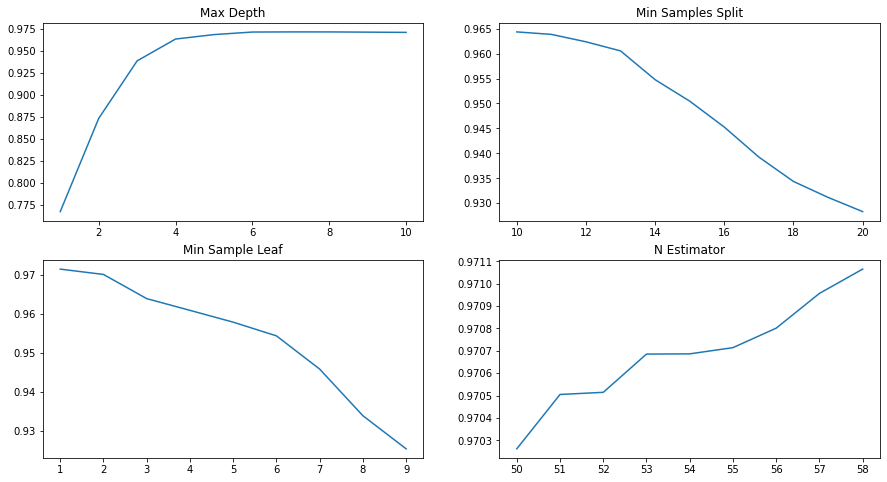

In [109]:
# Finding the best random forest optimization parameters using validation set

f, axarr = plt.subplots(2, 2)

# Max Depth
rf_acc = []
rf_depth = range(1,11)
for i in rf_depth:
    rf = RandomForestRegressor(random_state=1, max_depth=i)
    rf.fit(X_val, y_val)
    rf_acc.append(rf.score(X_test, y_test))
axarr[0, 0].plot(rf_depth,rf_acc)
axarr[0, 0].set_title('Max Depth')

#Min Samples Split
rf_acc = []
rf_samples_split = range(10,21)
for i in rf_samples_split:
    rf = RandomForestRegressor(random_state=1, min_samples_split=i)
    rf.fit(X_val, y_val)
    rf_acc.append(rf.score(X_test, y_test))
axarr[0, 1].plot(rf_samples_split,rf_acc)
axarr[0, 1].set_title('Min Samples Split')

#Min Sample Leaf
rf_acc = []
rf_samples_leaf = range(1,10)
for i in rf_samples_leaf:
    rf = RandomForestRegressor(random_state=1, min_samples_leaf=i)
    rf.fit(X_val, y_val)
    rf_acc.append(rf.score(X_test, y_test))

axarr[1, 0].plot(rf_samples_leaf,rf_acc)
axarr[1, 0].set_title('Min Sample Leaf')

#N Estimator
rf_acc = []
rf_estimators = range(50,59)
for i in rf_estimators:
    rf = RandomForestRegressor(random_state=1, n_estimators=i)
    rf.fit(X_val, y_val)
    rf_acc.append(rf.score(X_test, y_test))

axarr[1, 1].plot(rf_estimators,rf_acc)
axarr[1, 1].set_title('N Estimator')

plt.show()

In [81]:
# Random forest optimization parameters
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth' : [6, 7, 8],
              'min_samples_split': [10, 11, 12],
              'min_samples_leaf' : [1, 2, 3],
              'n_estimators': [56, 57, 58]}


#Create new model using the GridSearch
rf_random = GridSearchCV(regressor, parameters, cv=10)

#Apply the model
rf_random.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': [6, 7, 8], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [10, 11, 12],
                         'n_estimators': [56, 57, 58]})

In [83]:
#View the best parameters
time_start = time.time()

rf_random.best_params_

time_end = time.time() # Estimating running time
print(f'Run time : {time_end - time_start}, best parameters : {rf_random.best_params_}')

Run time : 0.0, best parameters : {'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 58}


In [84]:
# Predicted value
y_pred_ = rf_random.best_estimator_.predict(X_test)

In [85]:
#R2 score after optimization
best_random_rf = rf_random.best_estimator_

print('Training score: ', best_random_rf.score(X_train, y_train))
print('Testing score:  ', best_random_rf.score(X_test, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_)))

Training score:  0.9865799143198681
Testing score:   0.973009832624474
Root Mean Squared Error: 1.591732469537959


In [92]:
#Import decision tree regressor
from sklearn.tree import DecisionTreeRegressor
time_start = time.time()

# Create decision tree model 
dt_model = DecisionTreeRegressor(random_state=1)
# Apply the model
dt_model.fit(X_train, y_train)
# Predicted value
y_pred2 = dt_model.predict(X_test)

time_end = time.time() # Estimating running time of the model
print(f'Run time : {time_end - time_start}')

Run time : 0.003999948501586914


In [93]:
#R2 score before optimization
print('Training score: ', dt_model.score(X_train, y_train))
print('Testing score:  ', dt_model.score(X_test, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

Training score:  1.0
Testing score:   0.9552252655838454
Root Mean Squared Error: 2.046672465691123


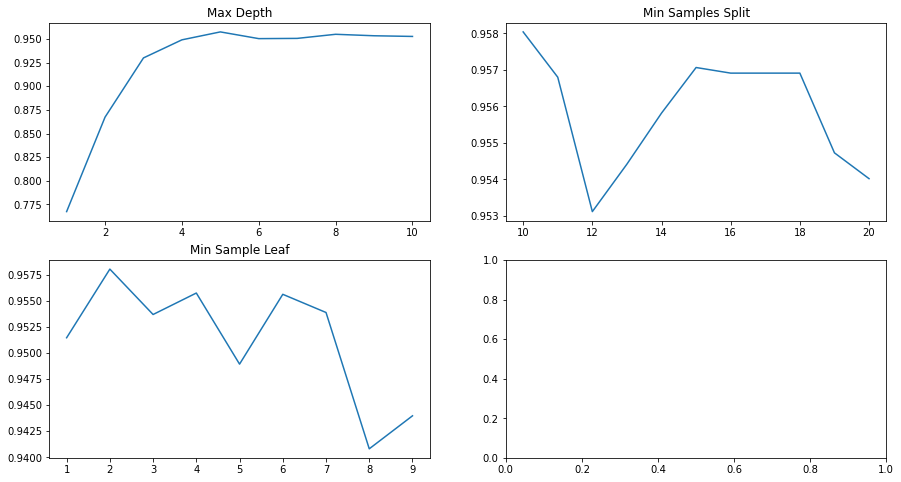

<Figure size 360x360 with 0 Axes>

In [95]:
# Finding the best decision tree optimization parameters using validation set

f, axarr = plt.subplots(2, 2)
# Max Depth
dt_acc = []
dt_depth = range(1,11)
for i in dt_depth:
    dt = DecisionTreeRegressor(random_state=1, max_depth=i)
    dt.fit(X_val, y_val)
    dt_acc.append(dt.score(X_test, y_test))
axarr[0, 0].plot(dt_depth,dt_acc)
axarr[0, 0].set_title('Max Depth')

#Min Samples Split
dt_acc = []
dt_samples_split = range(10,21)
for i in dt_samples_split:
    dt = DecisionTreeRegressor(random_state=1, min_samples_split=i)
    dt.fit(X_val, y_val)
    dt_acc.append(dt.score(X_test, y_test))
axarr[0, 1].plot(dt_samples_split,dt_acc)
axarr[0, 1].set_title('Min Samples Split')

#Min Sample Leaf
plt.figure(figsize = (5,5))
dt_acc = []
dt_samples_leaf = range(1,10)
for i in dt_samples_leaf:
    dt = DecisionTreeRegressor(random_state=1, min_samples_leaf=i)
    dt.fit(X_val, y_val)
    dt_acc.append(dt.score(X_test, y_test))

axarr[1, 0].plot(dt_samples_leaf,dt_acc)
axarr[1, 0].set_title('Min Sample Leaf')

plt.show()

In [96]:
# Decision tree optimization parameters
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth' : [4, 5, 6],
              'min_samples_split': [14, 16, 18],
              'min_samples_leaf' : [2, 4, 6]}


#Create new model using the GridSearch
dt_random = GridSearchCV(dt_model, parameters, cv=10)

#Apply the model
dt_random.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': [4, 5, 6], 'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [14, 16, 18]})

In [97]:
#View the best parameters
time_start = time.time()

dt_random.best_params_

time_end = time.time() # Estimating running time
print(f'Run time : {time_end - time_start}, best parameters : {dt_random.best_params_}')

Run time : 0.0, best parameters : {'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 16}


In [98]:
# Predicted value
y_pred2_ = dt_random.best_estimator_.predict(X_test)

In [99]:
#R2 score after optimization
dt_best_random = dt_random.best_estimator_

print('Training score: ', dt_best_random.score(X_train, y_train))
print('Testing score:  ', dt_best_random.score(X_test, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2_)))

Training score:  0.9837863239709275
Testing score:   0.9696950898703259
Root Mean Squared Error: 1.6896797326325856


In [100]:
#Import extra trees regressor
from sklearn.ensemble import ExtraTreesRegressor
time_start = time.time()

# Create extra trees model 
etr_model = ExtraTreesRegressor(random_state=123)
# Apply the model
etr_model.fit(X_train, y_train)
# Predicted value
y_pred3 = etr_model.predict(X_test)

time_end = time.time() # Estimating running time of the model
print(f'Run time : {time_end - time_start}')

Run time : 0.1242058277130127


In [101]:
#R2 score before optimization
print('Training score: ', etr_model.score(X_train, y_train))
print('Testing score:  ', etr_model.score(X_test, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

Training score:  1.0
Testing score:   0.9664640009735499
Root Mean Squared Error: 1.769812822354057


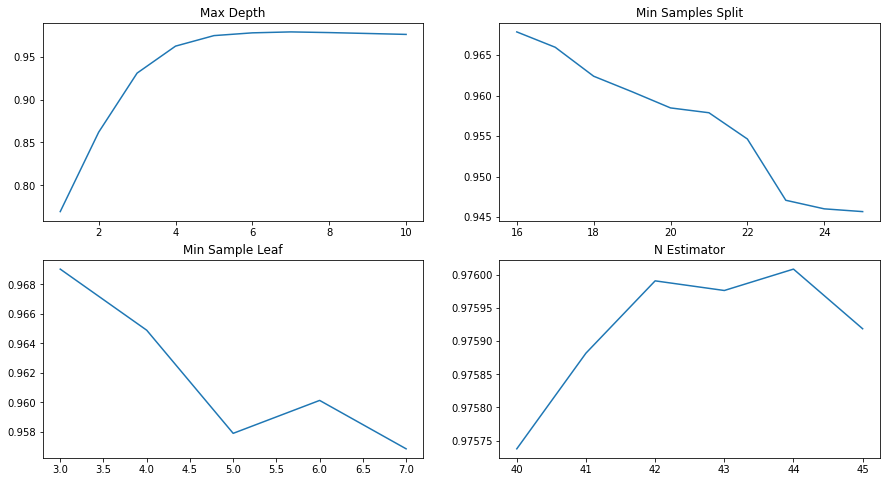

In [102]:
# Finding the best extra trees regressor optimization parameters using validation set

f, axarr = plt.subplots(2, 2)

# Max Depth
etr_acc = []
etr_depth = range(1,11)
for i in etr_depth:
    etr = ExtraTreesRegressor(random_state=123, max_depth=i)
    etr.fit(X_val, y_val)
    etr_acc.append(etr.score(X_test, y_test))
axarr[0, 0].plot(etr_depth,etr_acc)
axarr[0, 0].set_title('Max Depth')

#Min Samples Split
etr_acc = []
etr_samples_split = range(16,26)
for i in etr_samples_split:
    etr = ExtraTreesRegressor(random_state=123, min_samples_split=i)
    etr.fit(X_val, y_val)
    etr_acc.append(etr.score(X_test, y_test))
axarr[0, 1].plot(etr_samples_split,etr_acc)
axarr[0, 1].set_title('Min Samples Split')

#Min Sample Leaf
etr_acc = []
etr_samples_leaf = range(3,8)
for i in etr_samples_leaf:
    etr = ExtraTreesRegressor(random_state=123, min_samples_leaf=i)
    etr.fit(X_val, y_val)
    etr_acc.append(etr.score(X_test, y_test))

axarr[1, 0].plot(etr_samples_leaf,etr_acc)
axarr[1, 0].set_title('Min Sample Leaf')

#N Estimator
etr_acc = []
etr_estimators = range(40,46)
for i in etr_estimators:
    etr = ExtraTreesRegressor(random_state=123, n_estimators=i)
    etr.fit(X_val, y_val)
    etr_acc.append(etr.score(X_test, y_test))

axarr[1, 1].plot(etr_estimators,etr_acc)
axarr[1, 1].set_title('N Estimator')

plt.show()

In [105]:
# Extra trees regressor optimization parameters
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth' : [6, 7, 8],
              'min_samples_split': [16, 17, 18],
              'min_samples_leaf' : [3, 4],
              'n_estimators': [42, 43, 44]}


#Create new model using the GridSearch
etr_random = GridSearchCV(etr_model, parameters, cv=10)

#Apply the model
etr_random.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ExtraTreesRegressor(random_state=123),
             param_grid={'max_depth': [6, 7, 8], 'min_samples_leaf': [3, 4],
                         'min_samples_split': [16, 17, 18],
                         'n_estimators': [42, 43, 44]})

In [106]:
#View the best parameters
time_start = time.time()

etr_random.best_params_

time_end = time.time() # Estimating running time
print(f'Run time : {time_end - time_start}, best parameters : {etr_random.best_params_}')

Run time : 0.0, best parameters : {'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 18, 'n_estimators': 42}


In [107]:
# Predicted value
y_pred3_ = etr_random.best_estimator_.predict(X_test)

In [108]:
#R2 score after optimization
best_random_etr = etr_random.best_estimator_

print('Training score: ', best_random_etr.score(X_train, y_train))
print('Testing score:  ', best_random_etr.score(X_test, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3_)))

Training score:  0.9853862146778921
Testing score:   0.9757661206543629
Root Mean Squared Error: 1.5095338810049292


# Conclusion

R2 scores of  models before hyperparameter tuning ;

- __Random Forest Regressor__ --> Train: 0.9969723975924156 Test: 0.9704104945779182 Run time: 0.17013788223266602 ms
- __Desicion Tree Regressor__ --> Train: 1.0  Test: 0.9552252655838454 (Overfitting) Run time: 0.003999948501586914 ms
- __Extras Tree Regressor__   --> Train: 1.0  Test: 0.9664640009735499 (Overfitting) Run time: 0.1242058277130127 ms

R2 scores of  models after hyperparameter tuning ;

- __Random Forest Regressor__ --> Train: 0.9865799143198681 Test: 0.973009832624474
- __Desicion Tree Regressor__ --> Train: 0.9837863239709275 Test: 0.9696950898703259 
- __Extras Tree Regressor__   --> Train: 0.9853862146778921 Test: 0.9757661206543629 

We can see that both Desicion Tree and Extras Tree regressors has overfitting problem before we made hyperparameter tuning. That means our models ask questions to memorize values in the training set. We fixed that problem by changing the hyperparameters of our models. Random Forest Regresor gave the best results before hyperparameter optimization. After hyperparameter optimization we can see that Extras Tree Regressor model gives the best result amongst 3 models.